In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\hp victus\Downloads\summer-analytics-mid-hackathon\hacktrain.csv")

In [3]:
df.isnull()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,True,False,True,...,False,False,True,False,False,True,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
7996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7997,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


<Axes: >

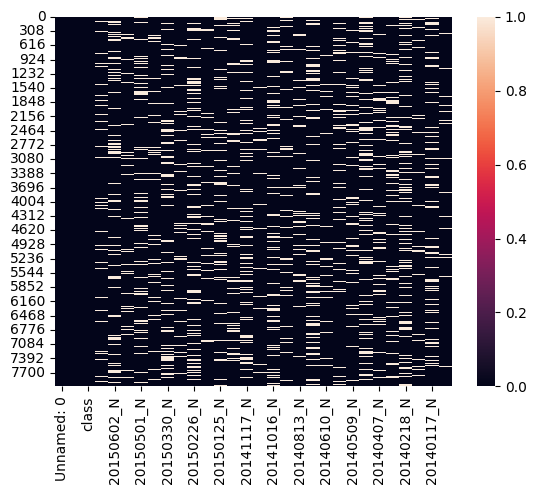

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [6]:
df.fillna(df.mean(numeric_only=True),inplace=True)

<Axes: >

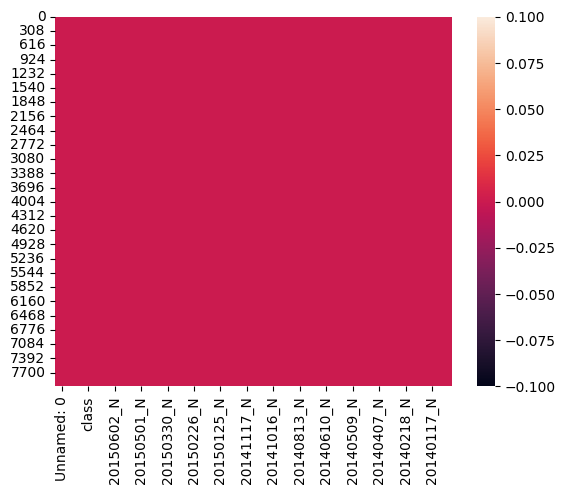

In [7]:
sns.heatmap(df.isnull())

In [8]:
df


,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668000,-1882.030000,-1924.360000,997.904000,-1739.990000,630.087000,...,4872.68167,-1043.160,-1942.490000,267.138000,2041.316792,2799.820342,211.328000,-2203.020,-1180.190000,433.906
1,1,2,water,634.2400,593.705000,-1625.790000,-1672.320000,914.198000,-692.386000,707.626000,...,4872.68167,-933.934,-625.385000,120.059000,364.858000,476.972000,220.878000,-2250.000,-1360.560000,524.075
2,3,4,water,58.0174,-1599.160000,4469.837748,-1052.630000,2927.586705,-1564.630000,3313.881373,...,-1025.88000,368.622,3012.178524,-1227.800000,304.621000,2799.820342,369.214000,-2202.120,2629.203972,-1343.550
3,4,5,water,72.5180,4868.091395,380.436000,-1256.930000,515.805000,-1413.180000,-802.942000,...,-1813.95000,155.624,3012.178524,-924.073000,432.150000,282.833000,298.320000,-2197.360,2629.203972,-826.727
4,7,8,water,1136.4400,4868.091395,4469.837748,1647.830000,1935.800000,4924.493648,2158.980000,...,1535.00000,1959.430,-279.317000,-384.915000,-113.406000,1020.720000,1660.650000,-116.801,-568.050000,-1357.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,10537,10538,impervious,1207.7000,984.620000,4469.837748,1166.250000,937.478000,1072.700000,823.896000,...,1117.74000,1176.600,1044.110000,3055.167358,369.082000,465.843000,362.882000,979.795,2629.203972,433.659
7996,10538,10539,impervious,2170.3500,1419.720000,1361.000000,1478.710000,983.911000,1262.110000,1422.860000,...,984.63400,2128.970,1379.660000,3055.167358,762.633000,485.204000,446.724000,771.747,1589.060000,506.936
7997,10541,10542,impervious,1895.6800,1454.740000,4469.837748,1033.560000,1930.380000,1057.150000,1471.600000,...,888.40800,2093.020,1232.110000,1190.830000,1441.460000,1170.880000,1095.000000,1818.650,2501.720000,1247.770
7998,10542,10543,impervious,3465.7400,1283.320000,413.412000,4391.050000,1146.820000,4473.050000,1614.750000,...,5833.76000,4047.320,4515.800000,433.177000,277.296000,744.143000,2144.360224,3759.710,2629.203972,388.346


In [16]:
X_train=df.drop(columns=['ID', 'class'])


In [17]:
for col in X_train:  
    series = df[col]  
    denoised = series.rolling(window=3, center=True).mean()
    df[col]=denoised

In [18]:
df1=pd.read_csv(r"C:\Users\hp victus\Downloads\summer-analytics-mid-hackathon\hacktest.csv")

<Axes: >

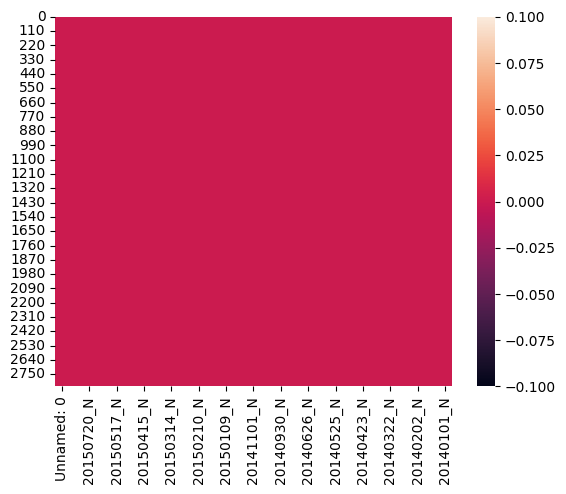

In [19]:
sns.heatmap(df1.isnull())

In [20]:
df1

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.4200,413.162,5761.000,5625.45,489.4030,3923.84,3097.110,6766.42000,...,801.184,927.115,4704.14,6378.42,340.949,2695.5700,527.268,4736.75,601.843,6639.760
1,1,2,7235.2600,6037.350,1027.560,6085.14,1618.0500,6668.54,2513.990,1051.69000,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.1400,3298.110,6942.68,1070.440,842.101
2,2,3,7425.0800,6969.980,1177.940,7408.93,861.0610,7644.43,814.458,1504.29000,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.9900,2206.100,6928.93,1036.560,831.441
3,3,4,7119.1200,1731.620,6311.930,6441.61,465.9790,7128.42,1649.120,6935.22000,...,959.344,5794.150,1045.57,5572.90,586.287,685.9060,1287.000,6734.72,824.584,6883.610
4,4,5,7519.5500,8130.260,1482.540,7879.53,1001.2100,7937.60,4122.530,1094.51000,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.5200,3283.940,7937.68,1857.800,1336.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,2840,2841,-1673.7400,-2514.480,-2451.190,-2738.44,64.4464,-2275.03,-2881.100,-4738.97000,...,-2257.890,-2582.420,-1699.10,-2295.30,306.483,209.4030,221.920,-4885.15,-2630.590,356.233
2841,2841,2842,-96.8233,-412.727,-1795.400,-2363.82,-2168.1900,-2162.68,-3155.740,-4416.11000,...,-3991.910,-2614.910,-2109.84,-2687.18,-2853.890,71.3402,-86.414,-5109.01,324.637,-4316.580
2842,2842,2843,-2364.6000,-155.592,-1422.090,-1713.40,465.6220,-2230.40,-3088.730,-5010.32000,...,-2484.500,-1756.080,-3820.43,-1988.23,433.852,291.8000,254.548,-4259.30,412.115,-1170.750
2843,2843,2844,-3004.6300,-1217.120,180.122,-1113.89,438.4180,-2442.51,-3210.560,-3237.74000,...,-3291.490,-2018.450,-3472.65,-3109.07,511.792,369.0970,276.948,-5574.51,298.739,460.419


In [23]:
X_test=df1.drop(columns=['ID'])

In [24]:
for col in X_test:  
    series = df1[col]  
    denoised = series.rolling(window=3, center=True).mean()
    df1[col]=denoised

In [25]:
def features(df):
    ndvi_cols = [col for col in df.columns if col.endswith('_N')]
    df['NDVI_mean'] = df[ndvi_cols].mean(axis=1)           #avearge vegetaion
    df['NDVI_std'] = df[ndvi_cols].std(axis=1)             #fluctuation 
    df['NDVI_min'] = df[ndvi_cols].min(axis=1)             #minimum vegeatation
    df['NDVI_max'] = df[ndvi_cols].max(axis=1)             #max vega=etation  
    df['NDVI_range'] = df['NDVI_max'] - df['NDVI_min']       #range
    ndvi_diff = df[ndvi_cols].diff(axis=1)
    df['ndvi_increased']= (ndvi_diff>0).sum(axis=1)
    df['NDVI_change_rate'] = ndvi_diff.mean(axis=1)        #rate of change of vegeatation

In [28]:
features(X_train)

In [29]:
features(X_test)

In [33]:
from sklearn.preprocessing import StandardScaler


exclude = ['ID', 'class']
feature_cols = [col for col in df.columns if col not in exclude]

X_train = df[feature_cols]
X_test = df1[feature_cols]

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Encode target labels if not already
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train= le.fit_transform(df['class'])




In [38]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

C:\Users\hp victus\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [39]:
preds = model.predict(X_test_scaled)
preds_labels = le.inverse_transform(preds)

In [41]:
submission = pd.DataFrame({'ID': df1['ID'], 'class': preds_labels})
submission.to_csv('submission.csv', index=False)